## Дипломная работа по python. Клекчян Павел

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats as st

## Задание 1

In [240]:
df = pd.read_csv('HR.csv', encoding='utf-8')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Задание 2

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Задание 3

In [4]:
df_corr = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

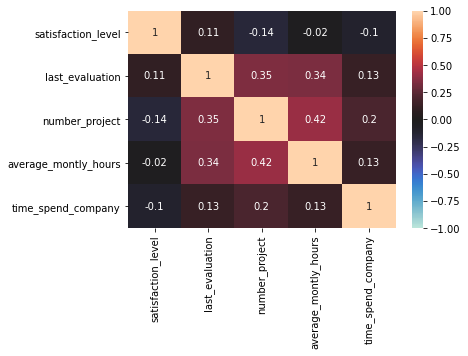

In [247]:
sbn.heatmap(df_corr, annot=True, vmin=-1, vmax=1, center= 0)

In [5]:
df_corr.abs().min()

satisfaction_level      0.020048
last_evaluation         0.105021
number_project          0.142970
average_montly_hours    0.020048
time_spend_company      0.100866
dtype: float64

Минимальная корреляция у значений столбцов **satisfaction_level** и **average_montly_hours**

In [6]:
df_corr.mask(df_corr == 1.0).abs().max()

satisfaction_level      0.142970
last_evaluation         0.349333
number_project          0.417211
average_montly_hours    0.417211
time_spend_company      0.196786
dtype: float64

Максимальная корреляция у значений столбцов **number_project** и **average_montly_hours**

## Задание 4

In [7]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Задание 5

In [8]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<AxesSubplot:>

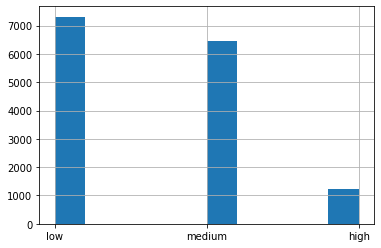

In [9]:
df['salary'].hist()

In [10]:
df['salary'].value_counts() 

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

## Задание 6

In [11]:
df_1 = df.groupby(['salary', 'department']).agg('count')
df_pivot = df_1.pivot_table(columns='salary', index='department', values='Work_accident')
df_pivot

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


## Задание 7

<AxesSubplot:>

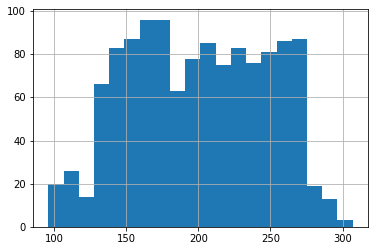

In [23]:
df_low_salary = df[df['salary'] == 'low']['average_montly_hours']
df_high_salary = df[df['salary'] == 'high']['average_montly_hours']
# df_low_salary.hist(bins=30)
df_high_salary.hist(bins=20)

Графики распределения не похожи на нормальные. Выбираем Критерий Манна Уитни

Уровень значимости alpha = 0.05

Cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

H0: Сотрудники с высоким окладом проводят на работе меньше времени, чем с низким

H1: Сотрудники с высоким окладом проводят на работе больше времени, чем с низким    

In [30]:
alpha = 0.05

In [32]:
stat, p = st.mannwhitneyu(df_low_salary, df_high_salary, alternative='greater')
# print(stat, p)
if p > alpha:
    print("Нет оснований отвергать нулевую гипотезу: Сотрудники с высоким окладом НЕ проводят на работе больше времени")
else:
    print("Отвергаем основную гипотезу и Не отвергаем альтернативную: Сотрудники с высоким окладом проводят на работе больше времени")  

Нет оснований отвергать нулевую гипотезу: Сотрудники с высоким окладом НЕ проводят на работе больше времени


Для интереса попробуем Т-тест Стьюдента:

In [33]:
result = st.ttest_ind(df_low_salary, df_high_salary, alternative='greater')
if result[1] > alpha:
    print("Нет оснований отвергать нулевую гипотезу: Сотрудники с высоким окладом НЕ проводят на работе больше времени")
else:
    print("Отвергаем основную гипотезу и Не отвергаем альтернативную: Сотрудники с высоким окладом проводят на работе больше времени")  

Нет оснований отвергать нулевую гипотезу: Сотрудники с высоким окладом НЕ проводят на работе больше времени


## Задание 8

In [56]:
df_left = df[df['left'] == 1]
df_working = df[df['left'] == 0]

### 8.1

In [46]:
percent = len(df_left[df_left['promotion_last_5years'] == 1])/len(df_left)
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся: ', round(percent, 4), '%', sep='')

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.0053%


In [47]:
percent = len(df_working[df_working['promotion_last_5years'] == 1])/len(df_left)
print('Доля сотрудников с повышением за последние 5 лет среди НЕ уволившихся: ', round(percent, 4), '%', sep='')

Доля сотрудников с повышением за последние 5 лет среди НЕ уволившихся: 0.084%


### 8.2

In [53]:
print('Средняя степень удовлетворенности среди уволившихся:', round(df_left['satisfaction_level'].mean(), 3))
print('Средняя степень удовлетворенности среди НЕ уволившихся:', round(df_working['satisfaction_level'].mean(), 3))

Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди НЕ уволившихся: 0.667


### 8.3

In [55]:
print('Среднее количество проектов среди уволившихся:',round(df_left['number_project'].mean(), 3))
print('Среднее количество проектов среди НЕ уволившихся:', round(df_working['number_project'].mean(), 3))

Среднее количество проектов среди уволившихся: 3.856
Среднее количество проектов среди НЕ уволившихся: 3.787


## Задание 9

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [183]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Разбиваем данные на тестовую и обучающую выборки**

In [239]:
x = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
        'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

**Нормализуем данные**

In [235]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

**Построим модель**

In [236]:
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)

**Оценим модель с помощью расчета точности**

In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.7557777777777778

**Оценим модель с помощью F1-score**

In [238]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)

0.7253706782558308